# Exploratory Data Analysis

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

## **Reading and Understanding The Provided Data**

In [2]:
amex = pd.read_csv("H:/Kaggle/AmericanExpress/train_data.csv", sep = ',')

In [3]:
print("The DataFrame consists of {} rows and {} features".format(amex.shape[0],amex.shape[1]))

The DataFrame consists of 5531451 rows and 190 features


In [4]:
amex.info(max_cols=190, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Data columns (total 190 columns):
 #    Column       Non-Null Count    Dtype  
---   ------       --------------    -----  
 0    customer_ID  5531451 non-null  object 
 1    S_2          5531451 non-null  object 
 2    P_2          5485466 non-null  float64
 3    D_39         5531451 non-null  float64
 4    B_1          5531451 non-null  float64
 5    B_2          5529435 non-null  float64
 6    R_1          5531451 non-null  float64
 7    S_3          4510907 non-null  float64
 8    D_41         5529435 non-null  float64
 9    B_3          5529435 non-null  float64
 10   D_42         791314 non-null   float64
 11   D_43         3873055 non-null  float64
 12   D_44         5257132 non-null  float64
 13   B_4          5531451 non-null  float64
 14   D_45         5529434 non-null  float64
 15   B_5          5531451 non-null  float64
 16   R_2          5531451 non-null  float64
 17   D_46         4319752 non-

In [5]:
# Count null values
var = amex.isnull().sum()
print(var.to_string())

customer_ID          0
S_2                  0
P_2              45985
D_39                 0
B_1                  0
B_2               2016
R_1                  0
S_3            1020544
D_41              2016
B_3               2016
D_42           4740137
D_43           1658396
D_44            274319
B_4                  0
D_45              2017
B_5                  0
R_2                  0
D_46           1211699
D_47                 0
D_48            718725
D_49           4985917
B_6                233
B_7                  0
B_8              22268
D_50           3142402
D_51                 0
B_9                  0
R_3                  0
D_52             29563
P_3             301492
B_10                 0
D_53           4084585
S_5                  0
B_11                 0
S_6                  0
D_54              2016
R_4                  0
S_7            1020544
B_12                 0
S_8                  0
D_55            184803
D_56           2990943
B_13             49519
R_5        

In [6]:
# Separate quantitative and qualitative values
quant_amex_vars = amex.columns[amex.dtypes != object]
qual_amex_vars = amex.columns[amex.dtypes == object]

In [7]:
# Show the list of quantitative values
print(quant_amex_vars)

Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42',
       'D_43',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=186)


In [8]:
# Show the list of qualitative values
print(qual_amex_vars)

Index(['customer_ID', 'S_2', 'D_63', 'D_64'], dtype='object')


In [9]:
# Summary statistics on quantitative columns
amex[quant_amex_vars].describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,5.485466e+06,5.531451e+06,5.531451e+06,5.529435e+06,5.531451e+06,4.510907e+06,5.529435e+06,5.529435e+06,791314.000000,3.873055e+06,...,1.946990e+05,1.946990e+05,1.946990e+05,5.429903e+06,5.490819e+06,5.429903e+06,944408.000000,5.429903e+06,5.490724e+06,5.429903e+06
mean,6.563340e-01,1.531172e-01,1.240100e-01,6.214887e-01,7.880270e-02,2.258455e-01,5.978469e-02,1.325389e-01,0.184974,1.546841e-01,...,2.427725e-01,1.424409e-02,1.646183e-01,1.789305e-01,2.664348e-02,1.645212e-01,0.390799,1.788022e-01,5.238952e-02,6.233496e-02
std,2.446494e-01,2.700709e-01,2.119869e-01,4.014877e-01,2.263971e-01,1.933475e-01,2.025443e-01,2.349929e-01,0.228185,2.133977e-01,...,2.101320e-01,9.571115e-02,2.670208e-01,3.790614e-01,1.455480e-01,3.482771e-01,0.236182,3.789498e-01,1.825135e-01,1.934937e-01
min,-4.589548e-01,5.026190e-09,-7.588799e+00,9.192280e-09,1.534223e-09,-6.271320e-01,5.566545e-10,6.285293e-09,-0.000454,1.154550e-07,...,6.316773e-08,1.078787e-08,3.307923e-08,3.767347e-10,3.725073e-09,1.650100e-10,-0.014539,5.549692e-09,2.500991e-09,1.226024e-09
25%,4.803307e-01,4.528464e-03,8.863645e-03,1.053313e-01,2.895934e-03,1.272588e-01,2.873244e-03,5.227570e-03,0.037516,4.227546e-02,...,9.314305e-03,2.532470e-03,3.517452e-03,3.027212e-03,2.555848e-03,3.026087e-03,0.199399,3.028116e-03,2.752896e-03,3.028347e-03
50%,6.942950e-01,9.056902e-03,3.132968e-02,8.143328e-01,5.782230e-03,1.639082e-01,5.746725e-03,9.777230e-03,0.120519,8.851245e-02,...,2.539468e-01,5.069830e-03,7.037814e-03,6.053010e-03,5.110523e-03,6.051590e-03,0.382136,6.053151e-03,5.508129e-03,6.053248e-03
75%,8.648159e-01,2.366407e-01,1.259019e-01,1.002403e+00,8.660590e-03,2.581017e-01,8.615665e-03,1.550507e-01,0.250869,1.843206e-01,...,2.582450e-01,7.573434e-03,5.015468e-01,9.080455e-03,7.663697e-03,9.078915e-03,0.559308,9.076287e-03,8.260447e-03,9.080930e-03
max,1.010000e+00,5.389619e+00,1.324060e+00,1.010000e+00,3.256284e+00,5.482888e+00,8.988807e+00,1.625262e+00,4.191119,1.011162e+01,...,1.759910e+00,1.009998e+00,3.005383e+00,1.010000e+00,1.010000e+00,1.339910e+00,2.229368,1.010000e+00,1.343331e+00,4.827630e+00


In [10]:
# Summary statistics on qualitative columns
amex[qual_amex_vars].describe()

,customer_ID,S_2,D_63,D_64
count,5531451,5531451,5531451,5314009
unique,458913,396,6,4
top,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-02-17,CO,O
freq,13,26715,4119621,2913244


In [11]:
amex_target = pd.read_csv("H:/Kaggle/AmericanExpress/train_labels.csv", sep = ',')
amex_target.head(10)

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
5,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,0
6,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0
7,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,0
8,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,1
9,00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e...,1


In [12]:
amex_target.info(max_cols=190, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_ID  458913 non-null  object
 1   target       458913 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


In [13]:
# Count null values
var = amex_target.isnull().sum()
print(var.to_string())

customer_ID    0
target         0


In [14]:
# Summary statistics
amex_target.describe()

,target
count,458913.000000
mean,0.258934
std,0.438050
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


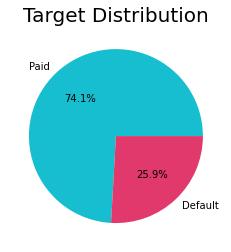

<Figure size 33.12x68.4 with 0 Axes>

In [15]:
target=amex_target.target.value_counts(normalize=True)
target.rename(index={1:'Default',0:'Paid'},inplace=True)
colors = ['#17becf', '#E1396C']
data = plt.pie(target,
                labels= target.index,
                colors=colors,
                autopct='%1.1f%%'
                )
layout = plt.title("Target Distribution",fontdict = {'fontsize' : 20})
fig = plt.figure(figsize = (0.46,0.95))

## **Skew**

In [16]:
# Histograms of each variable : 0.2 random sample of rows selected
# ---------------------------------------------------------------------
# random_state helps assure that you always get the same output when you split the data
# this helps create reproducible results and it does not actually matter what the number is
# frac is percentage of the data that will be returned
data_part = amex.sample(frac=0.6,random_state=42)
print(data_part.shape)

(3318871, 190)


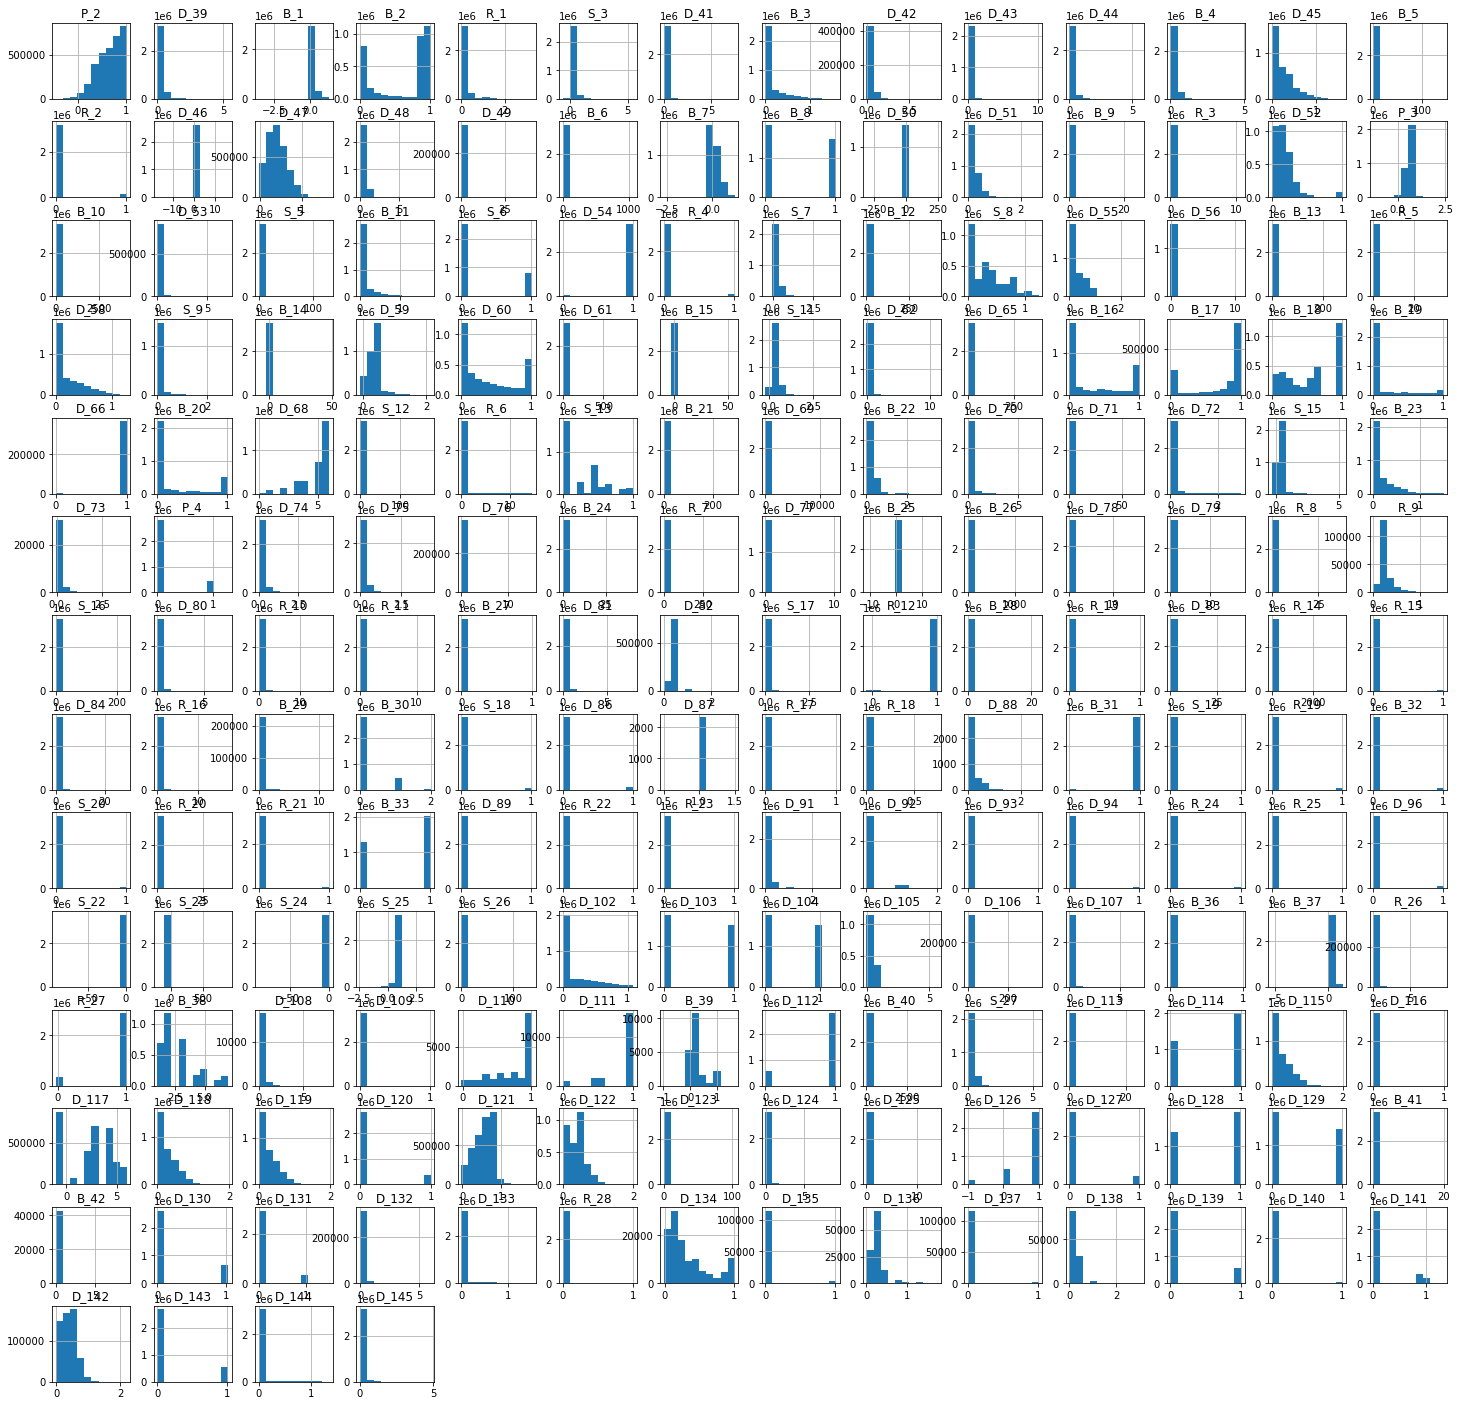

In [17]:
# plot the histogram of each parameter
data_part.hist(figsize=(25,25))
plt.show()

<br/>
<br/>
<br/>
The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. 

In [18]:
for col in (quant_amex_vars):
    print("Skewness of {} for ".format(amex[col].skew()),col)

Skewness of -0.6263722263546195 for  P_2
Skewness of 3.37366669242658 for  D_39
Skewness of 2.685342531437331 for  B_1
Skewness of -0.5527595835773854 for  B_2
Skewness of 3.8647382786992246 for  R_1
Skewness of 3.0413316121337006 for  S_3
Skewness of 6.588384251562673 for  D_41
Skewness of 2.2184111089034926 for  B_3
Skewness of 4.190975637164045 for  D_42
Skewness of 5.6400766107638916 for  D_43
Skewness of 3.0539464305048183 for  D_44
Skewness of 2.6072524110147612 for  B_4
Skewness of 1.3129717814158408 for  D_45
Skewness of 83.57763829594779 for  B_5
Skewness of 4.533449586285044 for  R_2
Skewness of 0.7318147094898746 for  D_46
Skewness of 0.48183371516758794 for  D_47
Skewness of 0.588123115901394 for  D_48
Skewness of 35.5584256478726 for  D_49
Skewness of 395.8205898826144 for  B_6
Skewness of 1.7955108869446237 for  B_7
Skewness of 0.21856764827215697 for  B_8
Skewness of 33.972049720639276 for  D_50
Skewness of 2.0830728530920055 for  D_51
Skewness of 5.178680069609397 for  

## **Handle Duplicates**

In [19]:
amex_no_duplicates = amex.drop_duplicates(subset=['customer_ID'])

In [20]:
amex_no_duplicates.info(max_cols=190, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458913 entries, 0 to 5531438
Data columns (total 190 columns):
 #    Column       Non-Null Count   Dtype  
---   ------       --------------   -----  
 0    customer_ID  458913 non-null  object 
 1    S_2          458913 non-null  object 
 2    P_2          441415 non-null  float64
 3    D_39         458913 non-null  float64
 4    B_1          458913 non-null  float64
 5    B_2          456897 non-null  float64
 6    R_1          458913 non-null  float64
 7    S_3          372973 non-null  float64
 8    D_41         456897 non-null  float64
 9    B_3          456897 non-null  float64
 10   D_42         109289 non-null  float64
 11   D_43         283185 non-null  float64
 12   D_44         420553 non-null  float64
 13   B_4          458913 non-null  float64
 14   D_45         456896 non-null  float64
 15   B_5          458913 non-null  float64
 16   R_2          458913 non-null  float64
 17   D_46         308101 non-null  float64
 18   D

In [21]:
# Count null values
var = amex_no_duplicates.isnull().sum()
print(var.to_string())

customer_ID         0
S_2                 0
P_2             17498
D_39                0
B_1                 0
B_2              2016
R_1                 0
S_3             85940
D_41             2016
B_3              2016
D_42           349624
D_43           175728
D_44            38360
B_4                 0
D_45             2017
B_5                 0
R_2                 0
D_46           150812
D_47                0
D_48            75827
D_49           421591
B_6               233
B_7                 0
B_8              4764
D_50           269933
D_51                0
B_9                 0
R_3                 0
D_52            18388
P_3             81836
B_10                0
D_53           359482
S_5                 0
B_11                0
S_6                 0
D_54             2016
R_4                 0
S_7             85940
B_12                0
S_8                 0
D_55            38280
D_56           283067
B_13            39795
R_5                 0
D_58                0
S_9       

In [22]:
# Summary statistics on quantitative columns
amex_no_duplicates[quant_amex_vars].describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,441415.000000,4.589130e+05,458913.000000,456897.000000,4.589130e+05,372973.000000,4.568970e+05,4.568970e+05,109289.000000,283185.000000,...,12731.000000,1.273100e+04,12731.000000,4.097470e+05,4.284340e+05,4.097470e+05,70920.000000,4.097470e+05,4.284210e+05,4.097470e+05
mean,0.659613,1.210624e-01,0.110349,0.659257,5.680385e-02,0.219800,4.472497e-02,1.024816e-01,0.191651,0.147662,...,0.217257,2.131871e-02,0.185561,1.780902e-01,2.406984e-02,1.636294e-01,0.385236,1.779520e-01,5.132359e-02,6.149211e-02
std,0.228537,2.313387e-01,0.197975,0.375762,1.825381e-01,0.174619,1.650737e-01,2.058287e-01,0.245330,0.199632,...,0.200183,1.268421e-01,0.272262,3.783378e-01,1.368201e-01,3.473282e-01,0.230633,3.782209e-01,1.801030e-01,1.908062e-01
min,-0.433779,4.098168e-08,-7.588799,0.000001,2.066058e-08,-0.467030,2.948928e-08,8.087374e-08,-0.000228,0.000001,...,0.000002,1.078787e-08,0.000001,2.454762e-08,5.186710e-09,1.073346e-08,-0.010745,1.010678e-08,1.027419e-07,4.244097e-08
25%,0.487480,3.776924e-03,0.008557,0.219787,2.764615e-03,0.130973,2.786147e-03,4.567195e-03,0.037892,0.041479,...,0.007785,2.488078e-03,0.003776,3.020884e-03,2.549160e-03,3.015321e-03,0.203309,3.025362e-03,2.751134e-03,3.024807e-03
50%,0.682762,7.529619e-03,0.027948,0.814880,5.530282e-03,0.166103,5.576411e-03,8.653824e-03,0.122296,0.085835,...,0.253102,5.089160e-03,0.007469,6.057791e-03,5.088038e-03,6.051388e-03,0.383404,6.041558e-03,5.499492e-03,6.038355e-03
75%,0.858055,1.516591e-01,0.108398,1.001716,8.293095e-03,0.250121,8.366036e-03,8.352411e-02,0.256808,0.177338,...,0.257613,7.581724e-03,0.502623,9.079245e-03,7.637465e-03,9.076036e-03,0.545619,9.064310e-03,8.256595e-03,9.073242e-03
max,1.010000,5.389326e+00,1.324059,1.010000,2.753790e+00,3.246689,7.505471e+00,1.490495e+00,4.189044,8.538821,...,1.759600,1.009998e+00,2.500704,1.010000e+00,1.009999e+00,1.324859e+00,2.182950,1.010000e+00,1.343316e+00,4.737025e+00


In [23]:
for col in quant_amex_vars:
    if amex_no_duplicates[col].isnull().sum() != 0:
        mean_value = amex_no_duplicates[col].mean(axis=0)
        amex_no_duplicates[col].replace(np.nan, mean_value, inplace=True)

C:\Users\radix\AppData\Local\Temp\ipykernel_12796\3062121698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amex_no_duplicates[col].replace(np.nan, mean_value, inplace=True)


In [24]:
# Summary statistics on qualitative columns
amex_no_duplicates[qual_amex_vars].describe()

,customer_ID,S_2,D_63,D_64
count,458913,458913,458913,380874
unique,458913,396,6,4
top,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-25,CO,O
freq,1,19142,345228,209749


## **Correlations**

In [25]:
amex_correlations = [ ]
top_features = [ ]
count = 0
for col in quant_amex_vars:
    pearson_coef, p_value = stats.pearsonr(amex_no_duplicates[col], amex_target['target'])
    amex_correlations.append(pearson_coef)
    if np.abs(pearson_coef) > 0.3:
        top_features.append(col)
        print(top_features[count], pearson_coef)
        count += 1

P_2 -0.5383460929670213
B_2 -0.3499531190167962
D_44 0.3688854031045568
D_48 0.4413568437165411
B_7 0.32918778770596324
B_8 0.32895286557189746
B_9 0.36707995935505033
D_55 0.30088262700552565
D_58 0.34655415066371775
D_62 -0.3116967877813311
B_18 -0.3589865014912577
B_23 0.32130409336143867
D_74 0.34558051237369847
D_75 0.36783882687714675


C:\Users\radix\anaconda3\envs\PyTorch\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


B_33 -0.30401288549019245


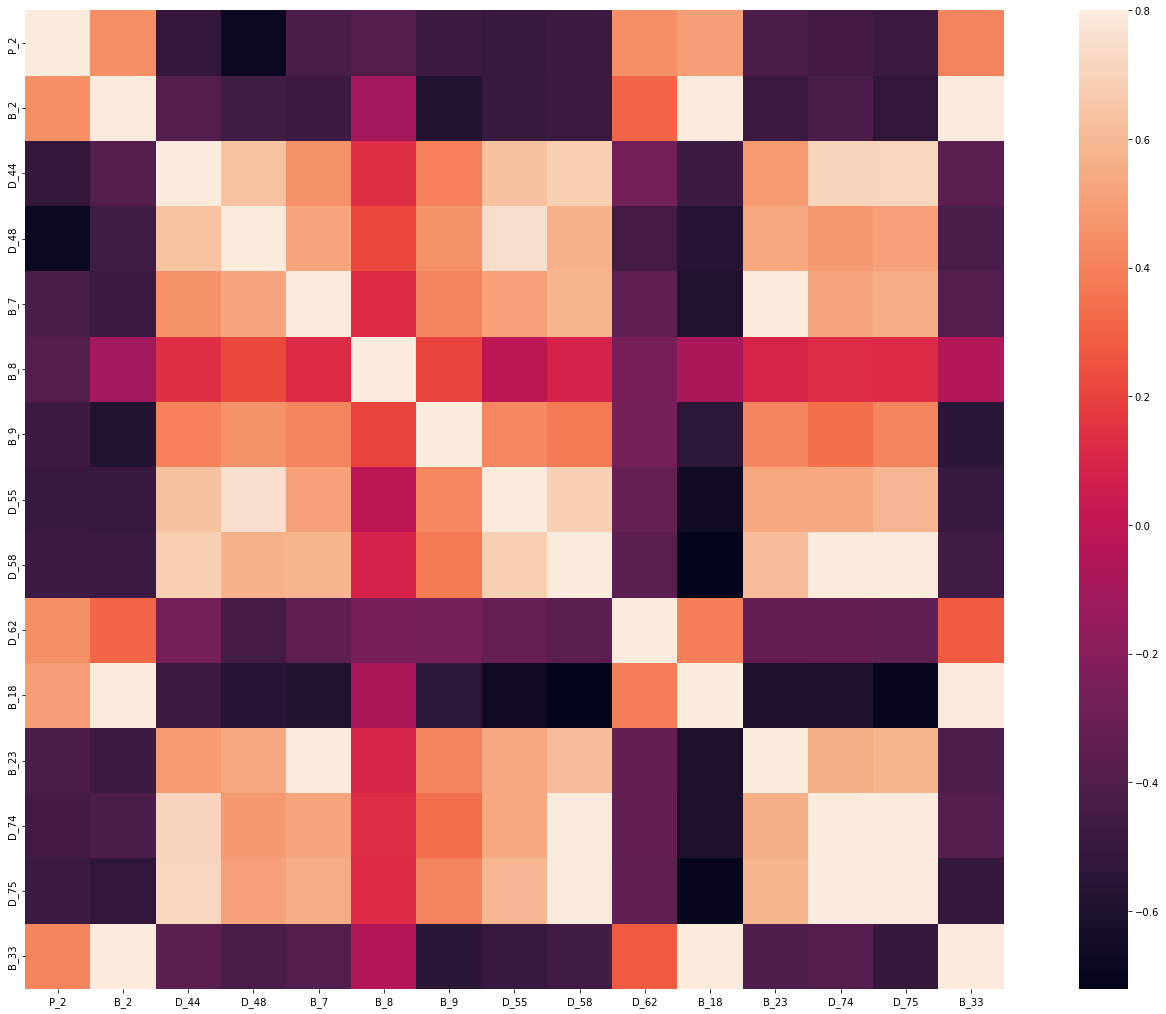

In [26]:
# Correlation Matrix
correlation_matrix = amex_no_duplicates[top_features].corr()
fig = plt.figure(figsize = (27,18))
sns.heatmap(correlation_matrix, vmax = .8, square = True)
plt.show()

## **Handle Missing Values**

In [27]:
# Count null values
var = amex_no_duplicates.isnull().sum()
print(var.to_string())

customer_ID        0
S_2                0
P_2                0
D_39               0
B_1                0
B_2                0
R_1                0
S_3                0
D_41               0
B_3                0
D_42               0
D_43               0
D_44               0
B_4                0
D_45               0
B_5                0
R_2                0
D_46               0
D_47               0
D_48               0
D_49               0
B_6                0
B_7                0
B_8                0
D_50               0
D_51               0
B_9                0
R_3                0
D_52               0
P_3                0
B_10               0
D_53               0
S_5                0
B_11               0
S_6                0
D_54               0
R_4                0
S_7                0
B_12               0
S_8                0
D_55               0
D_56               0
B_13               0
R_5                0
D_58               0
S_9                0
B_14               0
D_59         

In [28]:
amex_no_duplicates.drop(['D_64'],axis=1,inplace=True)

C:\Users\radix\AppData\Local\Temp\ipykernel_12796\2040410056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amex_no_duplicates.drop(['D_64'],axis=1,inplace=True)


## **Feature Exploration**

In [32]:
# Determine the number of Paid v Default cases
default = amex_target[amex_target['target'] == 1]
paid = amex_target[amex_target['target'] == 0] 

outlier_fraction = len(default) / float(len(paid))

print('Outlier_Fraction: {}'.format(outlier_fraction))
print('Default Cases: {}'.format(len(default)))
print('Paid Cases: {}'.format(len(paid)))

Outlier_Fraction: 0.3494067659555699
Default Cases: 118828
Paid Cases: 340085
